# PHYS 210, Homework 11, Part 2
Due Wednesday, Oct 15, 2025 at the start of class on Canvas

# About this homework assignment

This homework assignment is designed to get everybody started on Project 02. It is considered Stage 1 of a 3-stage process in developing your project, as described in the [Project 02 Instructions](https://physics210.github.io/p210-2025/Project02-instructions.html)

In this homework assignment, you are going to learn more about improving the accuracy of `solve_ivp` solutions, in the context of making a stable circular orbit of an electorn around a proton. This process will also help you understand the order of magnitude for reasonable values to use for your `t_span` argument in `solve_ivp` when you do your Project 02 investigations.

# Task 1: Characterize the parameters for your desired orbital distance

For this task, you need to first decide on the distance scale you will be using for your Project 02 investigations. Although the initial context for this project is the Saturnian atomic model (again, see the [Project 02 Instructions](https://physics210.github.io/p210-2025/Project02-instructions.html)), it is really about characterizing the orbits of one or more electrons around one or more fixed, positive charges. As such, you are welcome to choose any distance scale that you are comfortable with. In the past, people have used distance scales as small as the Bohr radius or as large as tens of meters.

Once you have chosen your distance scale, determine the following quantities for an electron orbiting a proton:
1. The orbital radius $(r_0)$ that you would like to use,
1. Calculate the corresponding orbital speed $(v_0)$, and
1. Calculate the corresponding orbital period $(T)$.

If you need a reminder for how to calculate these quantities, have a look at the topics of gravitation or orbital motion in your intro Physics textbook, where you would replace the Universal Law of Gravitation with Coulomb's Law to determine the central force.

In [ ]:
# Enter your values here
r0 = ...
v0 = ...
T = ...

# Task 2a: Use `solve_ivp` to model 10 orbits at a maximum step size of `T/200`

Below is some starter code to help you get a basic `solve_ivp` model up and running. You're going to let the simulation run for 10 orbital periods, `t_span = (0, 10*T)`, and use a small maximum step size of `max_step = T/200`, which corresponds to a minimum of 200 time steps per orbit. We will investigate the impact of `max_step` later in this assignment.

Refer back to your work on group Worksheet 10 for further help on getting everything setup.

In [ ]:
# Update the code in this cell

# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Set some important parameters
max_step = T/200
t_span = (0, 10*T)
state0 = (r0, 0, 0, v0) # x0, y0, vx0, vy0

# Define your diff_eqns function
def diff_eqns(t, state):
    ...
    

# Get your solution from solve_ivp    
sol1 = solve_ivp(diff_eqns, t_span, state0, max_step=max_step)

# Task 2b: Create some useful diagnostic plots

Let's ensure that the set of parameters used for `solve_ivp` in Task 2 actually resulted in uniform circular motion. You are going to construct three plots to check that the electron is undergoing uniform circular motion as intended:

1. A plot of `y` vs `x` to visualize what the orbits look like,
1. A plot of `y` vs `t` to ensure you actually have 10 orbits,
1. A plot of energies vs `t` in the system, specifically `Total Energy`, `Kinetic Energy` and `Potential Energy`

We include example plots below (without units) for you to compare your shapes against. You do not need to duplicate the format of any of the example plots. They are provided as comparison references for the shapes of the curves.

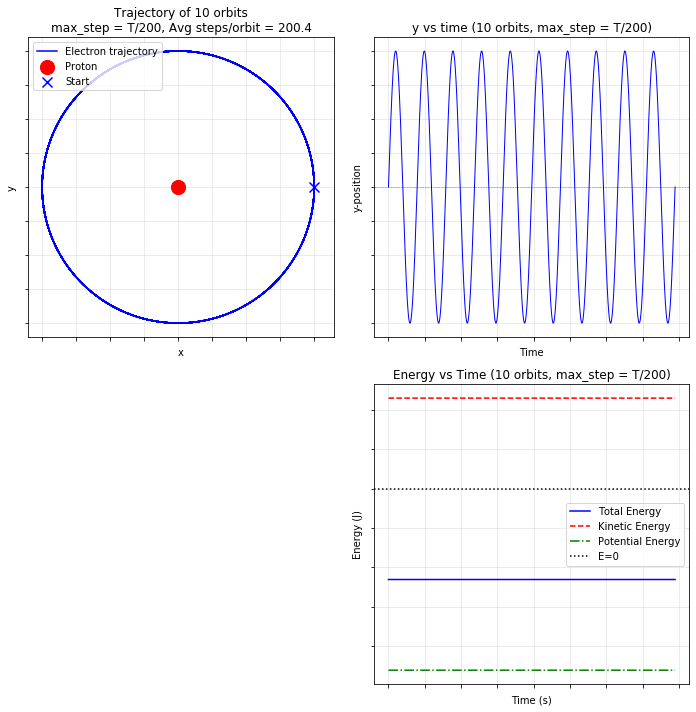

In [ ]:
# Plot y vs x



In [ ]:
# Plot y vs t



In [ ]:
# Plot different forms of energy vs time



# Task 3: Model 10 orbits at `max_step = T/10`

In this task we increase the time step `max_step` from `T/200` to `T/10`, which means that the `solve_ivp` solver will go from 200+ time steps per orbit to 10+ time steps per orbit. We investigate what impact this has on the accuracy of our solutions.

Copy any needed code from above and update your code to run `solve_ivp` for a maximum step size of `max_step = T/10`. Produce the same set of plots.

**Once you have produced your plots:** Take note that once we go down to a `max_step` equal to one tenth of the orbital period that the orbits will no longer look smooth because the electron travels so far in each step. Additionally, it will look like the orbit is decaying slowly based on both the `y` vs `t` graph, which will be reinforced further by the energy curves showing that energy is not conserved at this larger step size.

**Take home message:** Smaller step sizes improve accuracy, and ensure that energy is conserved at the scale relevant to our investigations.

*Example plots are included at the end of this document.*

# Task 4: Model 10 orbits without the `max_step` argument

In this task we remove the `max_step` argument from our call to `solve_ivp`, which hands control of the step sizes over to the default settings for the `solve_ivp` adaptive step size algorithm. The adaptive step size algorithm automatically adjusts the size of the time steps it takes when running the solver such that it uses smaller steps when the solution changes rapidly (for improved accuracy) and larger steps when it changes slowly (for improved efficiency). By using `max_step` previously, we have been forcing the solver to use smaller step sizes than its default settings. 

Copy any needed code from above and update your code to run `solve_ivp` again, but this time without the `max_step` parameter at all:

```python
sol = solve_ivp(diff_eqns, t_span, state0)
```

**Once you have produced your plots:** You should observe that if we let the `solve_ivp` adaptive step size algorithm take full control of running our simulation---when we don't specify `max_step` at all---that our orbit decays even more quickly. And our energy conservation is in a significantly worse place than in Task 3.

*Example plots are included at the end of this document.*

# Task 5: Model 10 orbits without the `max_step` argument, but with `rtol` and `atol` parameters set

In this task we investigate providing constraints to the adaptive step size algorithm by using the tolerance settings `rtol` and `atol` instead of `max_step`. The tolerance settings `atol` (absolute tolerance) and `rtol` (relative tolerance) control the accuracy of the solution by setting error thresholds for the adaptive step size algorithm. The `solve_ivp` solver ensures the estimated error at each step satisfies: `error ≤ atol + rtol × |y|`, where **smaller values give more accurate but much slower solutions**.

Copy any needed code from above and update your code to run `solve_ivp`, again without the `max_step` parameter, but this time including tolerance settings `rtol` and `atol`:

```python
sol = solve_ivp(diff_eqns, t_span, state0, rtol=1e-9, atol=1e-9)
```

**Once you have produced your plots:** For these new solutions you should observe that we are back in a place where the circular orbit has a stable radius and where energy is reasonably well conserved.

*Example plots are included at the end of this document.*

# Summary

We have learned that the default settings for the `solve_ivp` adaptive step size algorithm will not provide high enough accuracy for you to perform your Project 02 investigations. You need to make use of a combination of the `max_step`, `rtol` and `atol` arguments to ensure that your simulations are running at sufficiently high accuracy for your needs. 

As suggested above, you can combine `max_step` with `rtol` and `atol` in a single call to `solve_ivp`. E.g.,

```python
sol = solve_ivp(diff_eqns, t_span, state0, max_step=max_step, rtol=1e-9, atol=1e-9)
```
It is important to remember that the smaller you make your values for `max_step`, `rtol` and `atol` the longer it will take for your `solve_ivp` solution to run.

The other critical lesson from this homework is the importance of monitoring your output to ensure that when you observe unstable orbits in your Project 02 investigations, that the instability is not due to poor accuracy.

# Appendix - Example plots for Tasks 3-5

## Example plots for Task 3

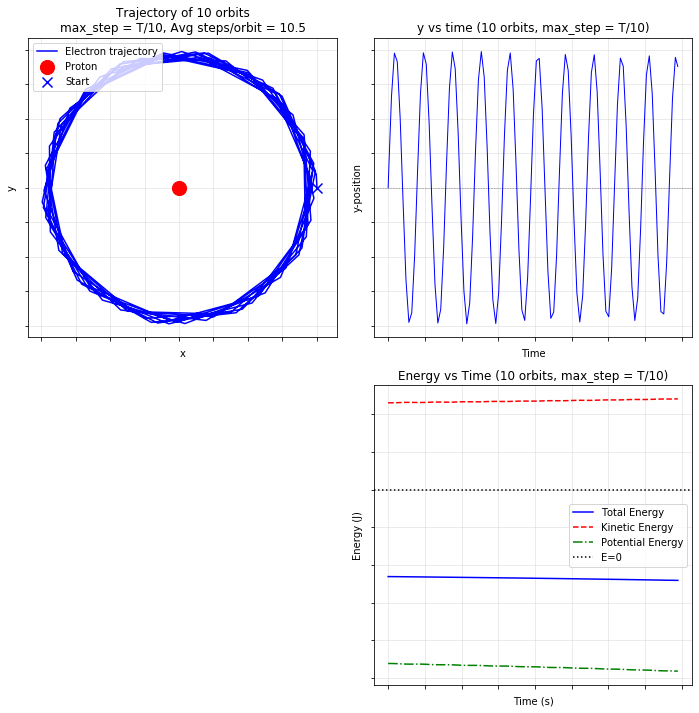

## Example plots for Task 4

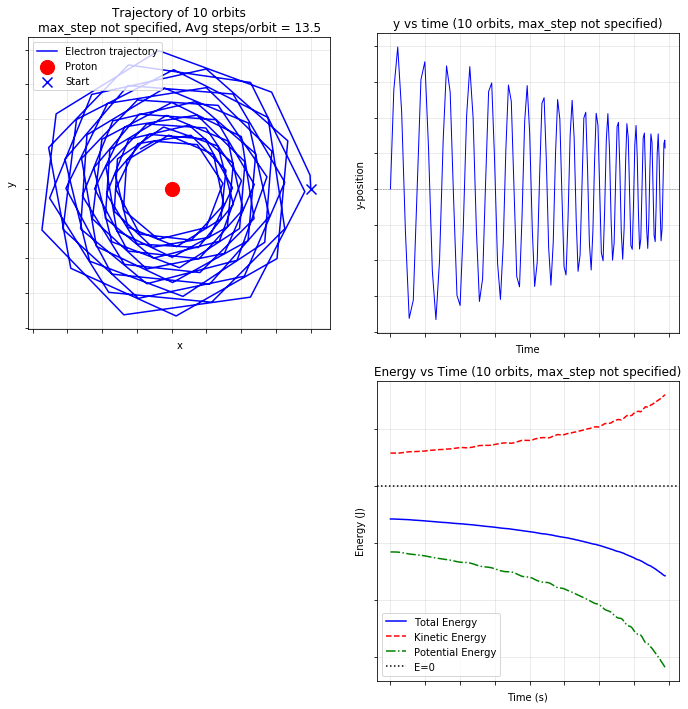

## Example plots for Task 5

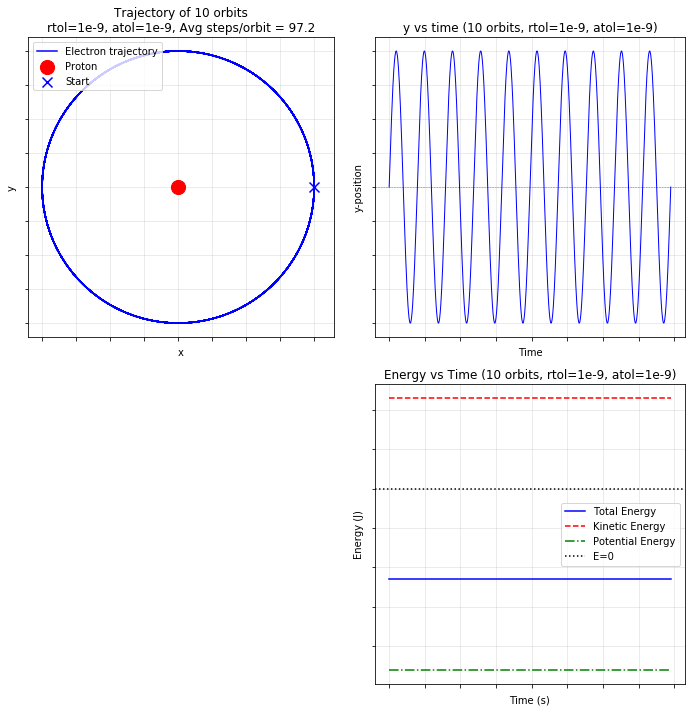

# Completing Homework 11, Part 2 and submitting it to Canvas
Before submitting your work, restart + rerun your entire notebook to make sure that everything runs correctly and without error.

To do this:
1. **Restart & Run All:** From the "Kernel" menu to the right of the "Cell" menu, select "Restart & Run All". This will restart the python Kernel, erasing all variables currently stored in memory so that when you "Run All" cells, you can ensure that if you were to run your notebook again on a later day, it would run as intended.
1. Look through the whole notebook and make sure there are no errors. Many questions have purposeful errors in the distributed version so make sure you have fixed them all such that "Restart & Run All" will run through the whole book and successfully print "The notebook ran without errors" at the end. If you have any trouble resolving the errors, please ask one of your classmates or ask us in class or on Piazza.

**Export notebook as HTML:** After you've executed and checked your notebook, choose: File => Save_and_Export_Notebook_As => HTML. This will download an HTML version of your notebook to your computer. This version is can not be executed or modified. You may need to disable any pop-up blockers to allow the file to be downloaded.

**Submit to Canvas:** Submit the html file that you just downloaded AND your .ipynb file to the Homework 05 submission quiz on Canvas.